## Creating a sample dataset

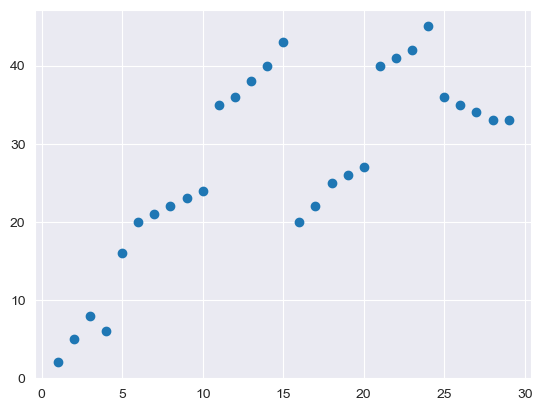

In [96]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(range(1,30)).reshape(-1, 1)
y = np.array([2,5,8,6,16,20,21,22,23,24,35,36,38,40,43,20,22,25,26,27,40,41,42,45,36,35,34,33,33])
plt.scatter(X,y)

## Splitting the dataset to train and test

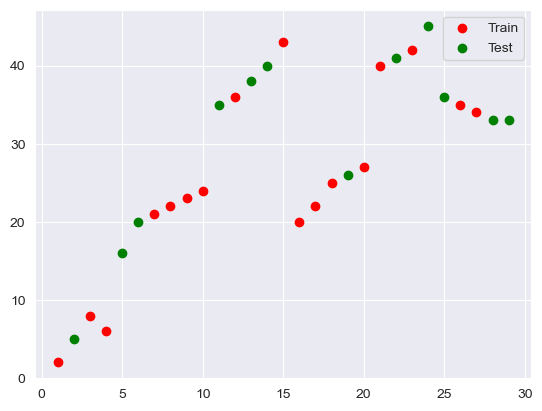

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,shuffle=True, random_state=20)


plt.scatter(X_train,y_train,c="red",label="Train")
plt.scatter(X_test,y_test,c="green", label="Test")
plt.legend()

## Fitting the data to a simple model (Linear Regression)

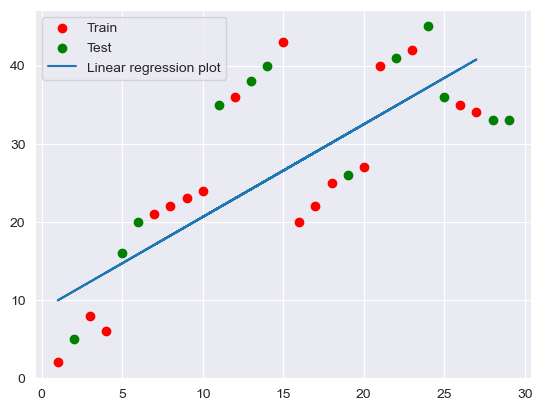

In [107]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="green", label="Test")
plt.plot(X_train, lr.predict(X_train), label="Linear regression plot")
plt.legend()

## Fitting the data to a complex model (Polynomial regression with 11 coefficients)

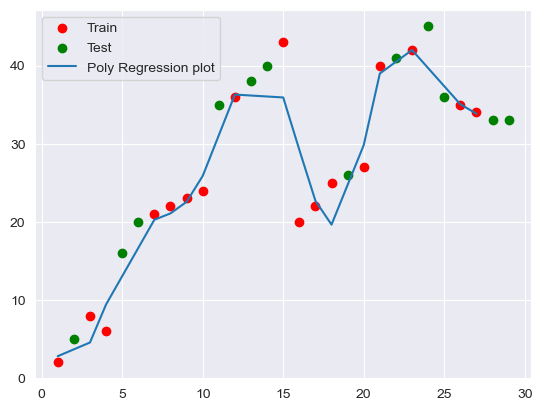

<Figure size 640x480 with 0 Axes>

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a polynomial regression model
poly_reg = make_pipeline(PolynomialFeatures(11), LinearRegression())
poly_reg.fit(X_train, y_train)

# Plot the model predictions
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="green", label="Test")
plt.plot(np.sort(X_train.reshape(1,-1)).reshape(-1,1),
         poly_reg.predict(np.sort(X_train.reshape(1,-1)).reshape(-1,1)),
         label="Poly Regression plot")
plt.legend()
plt.show()

## Understanding Bias and Variance

In [111]:
from sklearn.metrics import mean_squared_error

print("Linear Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,lr.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,lr.predict(X_test))}")
print("------------------------------------------------------------------------")
print("Polynomial Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,poly_reg.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,poly_reg.predict(X_test))}")
print("------------------------------------------------------------------------")

Linear Regression
Training error (Bias): 55.193900404890975
Testing error (Variance): 79.27394947533169
------------------------------------------------------------------------
Polynomial Regression
Training error (Bias): 11.929787550785488
Testing error (Variance): 44280.4621052385
------------------------------------------------------------------------


## Solving Bias and Variance: Reducing the number of coefficients in polynomial regression

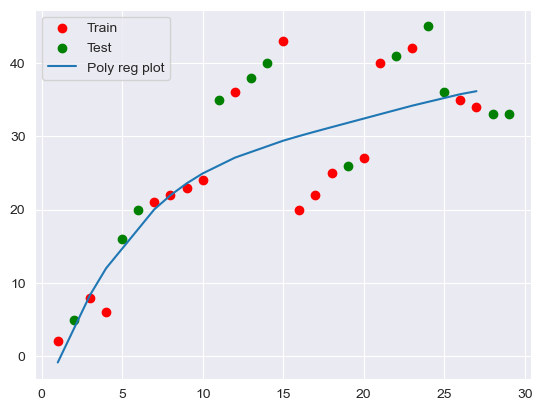

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a polynomial regression model
upd_poly_reg = make_pipeline(PolynomialFeatures(4), LinearRegression())
upd_poly_reg.fit(X_train, y_train)

# Plot the model predictions
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="green", label="Test")
plt.plot(np.sort(X_train.reshape(1,-1)).reshape(-1,1),
         upd_poly_reg.predict(np.sort(X_train.reshape(1,-1)).reshape(-1,1)),
         label="Poly reg plot")
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error

print("Linear Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,lr.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,lr.predict(X_test))}")
print("------------------------------------------------------------------------")
print("Polynomial Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,poly_reg.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,poly_reg.predict(X_test))}")
print("------------------------------------------------------------------------")
print("Updated Polynomial Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,upd_poly_reg.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,upd_poly_reg.predict(X_test))}")
print("------------------------------------------------------------------------")

Linear Regression
Training error (Bias): 55.193900404890975
Testing error (Variance): 79.27394947533169
------------------------------------------------------------------------
Polynomial Regression
Training error (Bias): 11.929787550785488
Testing error (Variance): 44280.4621052385
------------------------------------------------------------------------
Updated Polynomial Regression
Training error (Bias): 39.415833444675755
Testing error (Variance): 44.469986638751095
------------------------------------------------------------------------


## Solving Bias and Variance: Using an ensemble model (RandomForestRegressor)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create a random forest regressor
rf = RandomForestRegressor(random_state=42)
# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 4, 6, 8, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [112]:
from sklearn.metrics import mean_squared_error

print("Linear Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,lr.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,lr.predict(X_test))}")
print("------------------------------------------------------------------------")
print("Polynomial Regression")
print(f"Training error (Bias): {mean_squared_error(y_train,poly_reg.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,poly_reg.predict(X_test))}")
print("------------------------------------------------------------------------")
print("Random Forest Regression")
print(f"Training Error (Bias): {mean_squared_error(y_train,grid_search.best_estimator_.predict(X_train))}")
print(f"Testing error (Variance): {mean_squared_error(y_test,grid_search.best_estimator_.predict(X_test))}")

Linear Regression
Training error (Bias): 55.193900404890975
Testing error (Variance): 79.27394947533169
------------------------------------------------------------------------
Polynomial Regression
Training error (Bias): 11.929787550785488
Testing error (Variance): 44280.4621052385
------------------------------------------------------------------------
Random Forest Regression
Training Error (Bias): 28.047331809174906
Testing error (Variance): 37.78838699061525
